In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.makedirs('../plots', exist_ok=True)
df = pd.read_csv('..\\data\\data1.csv')

In [3]:
df.describe()

,Price,Open,High,Low,Vol.,Change %
count,7425.000000,7425.000000,7425.000000,7425.000000,7.425000e+03,7425.000000
mean,7423.515589,7427.262329,7469.377561,7375.823103,1.838787e+08,0.052432
std,6822.687138,6826.558018,6850.774287,6793.264642,1.584318e+08,1.415812
min,788.150000,786.370000,805.820000,775.430000,0.000000e+00,-12.980000
25%,1553.200000,1549.650000,1571.300000,1530.600000,6.380000e+07,-0.600000
50%,5333.250000,5340.250000,5377.550000,5293.450000,1.462700e+08,0.080000
75%,10584.750000,10603.450000,10633.150000,10534.550000,2.483000e+08,0.740000
max,26328.550000,26333.700000,26373.200000,26210.050000,9.976500e+08,17.740000


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7425 entries, 0 to 7424
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      7425 non-null   str    
 1   Price     7425 non-null   float64
 2   Open      7425 non-null   float64
 3   High      7425 non-null   float64
 4   Low       7425 non-null   float64
 5   Vol.      7425 non-null   int64  
 6   Change %  7425 non-null   float64
dtypes: float64(5), int64(1), str(1)
memory usage: 406.2 KB


In [5]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [6]:
df.corr(numeric_only=True)

,Price,Open,High,Low,Vol.,Change %
Price,1.000000,0.999930,0.999966,0.999967,0.610667,0.003474
Open,0.999930,1.000000,0.999971,0.999955,0.610836,-0.004107
High,0.999966,0.999971,1.000000,0.999946,0.611803,-0.000728
Low,0.999967,0.999955,0.999946,1.000000,0.609397,0.000366
Vol.,0.610667,0.610836,0.611803,0.609397,1.000000,0.012205
Change %,0.003474,-0.004107,-0.000728,0.000366,0.012205,1.000000


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

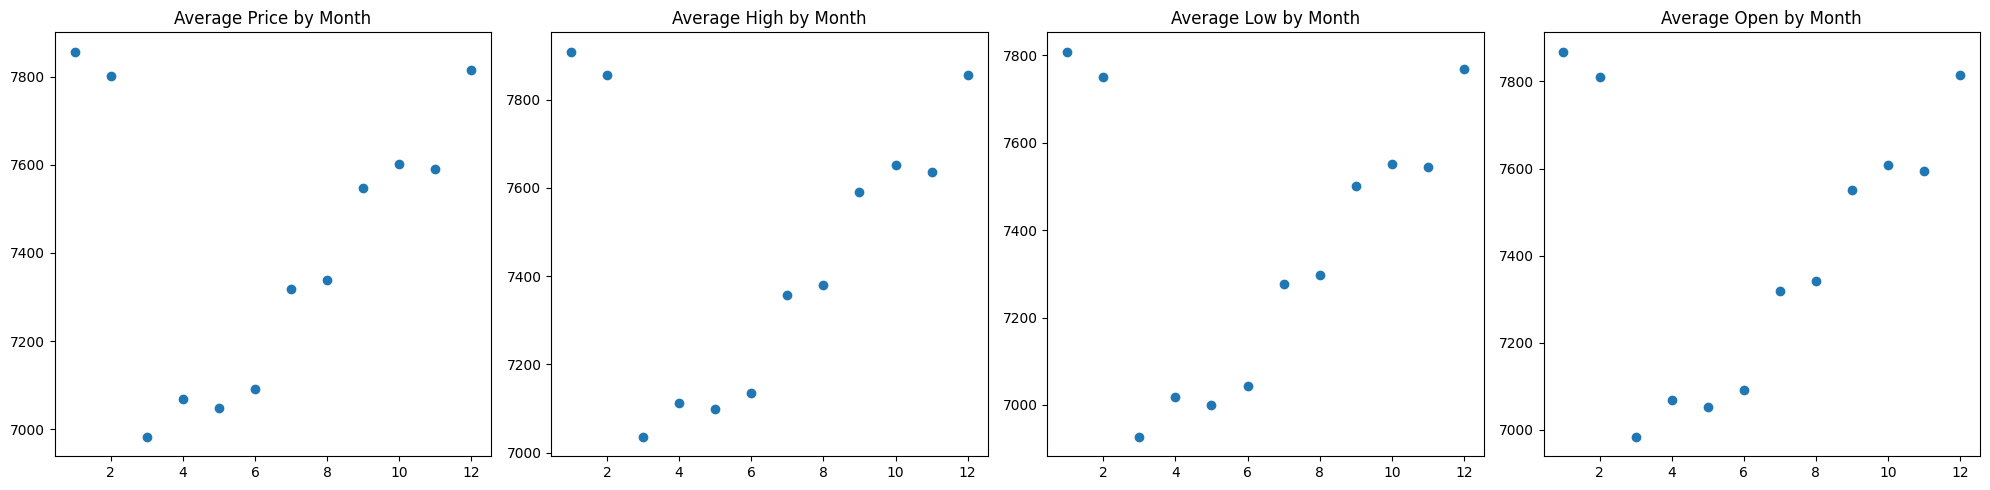

In [8]:
monthly = df.groupby(df.index.month).mean()

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].scatter(monthly.index, monthly['Price'])
ax[0].set_title('Average Price by Month')

ax[1].scatter(monthly.index, monthly['High'])
ax[1].set_title('Average High by Month')

ax[2].scatter(monthly.index, monthly['Low'])
ax[2].set_title('Average Low by Month')

ax[3].scatter(monthly.index, monthly['Open'])
ax[3].set_title('Average Open by Month')

plt.tight_layout()
plt.show()

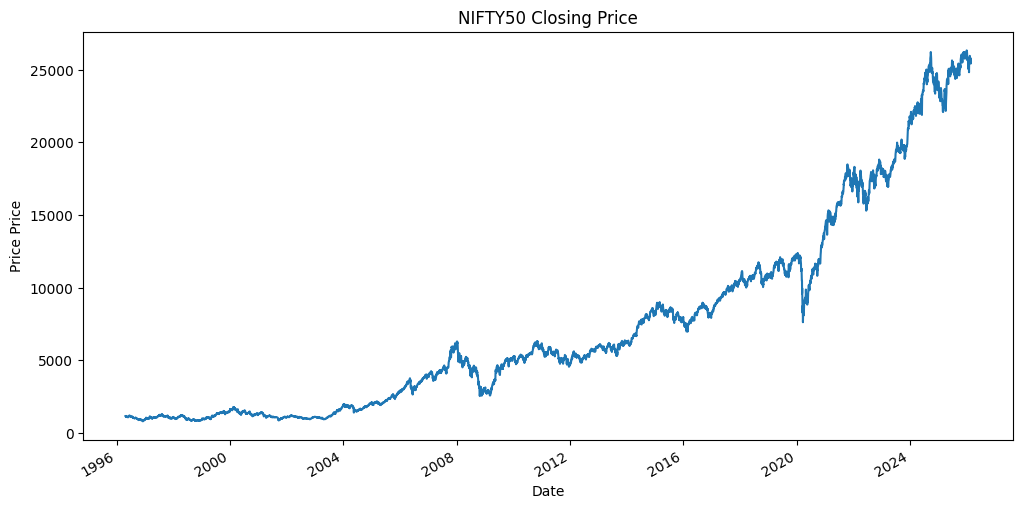

In [9]:
df['Price'].plot(figsize=(12, 6))
plt.title('NIFTY50 Closing Price')
plt.xlabel('Date')
plt.ylabel('Price Price')
plt.show()

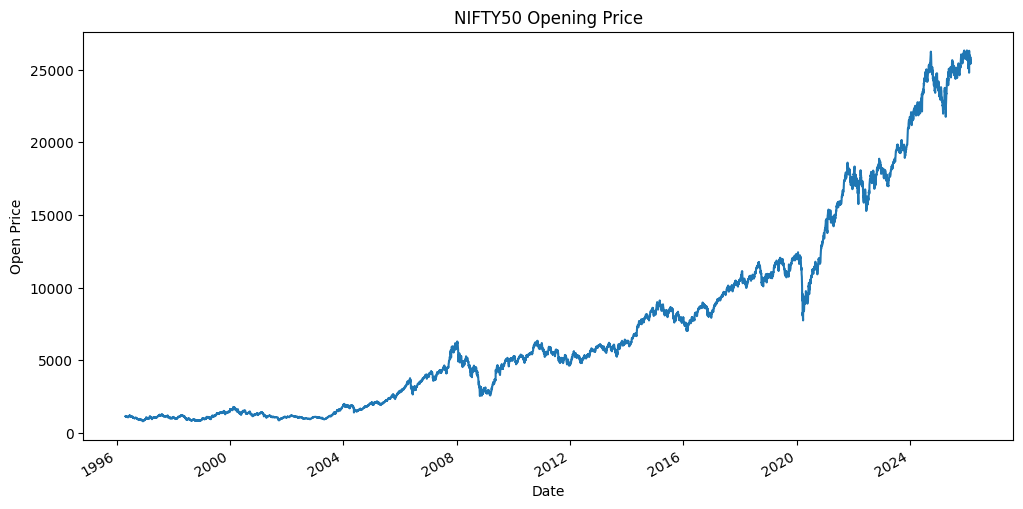

In [10]:
df['Open'].plot(figsize=(12, 6))        
plt.title('NIFTY50 Opening Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

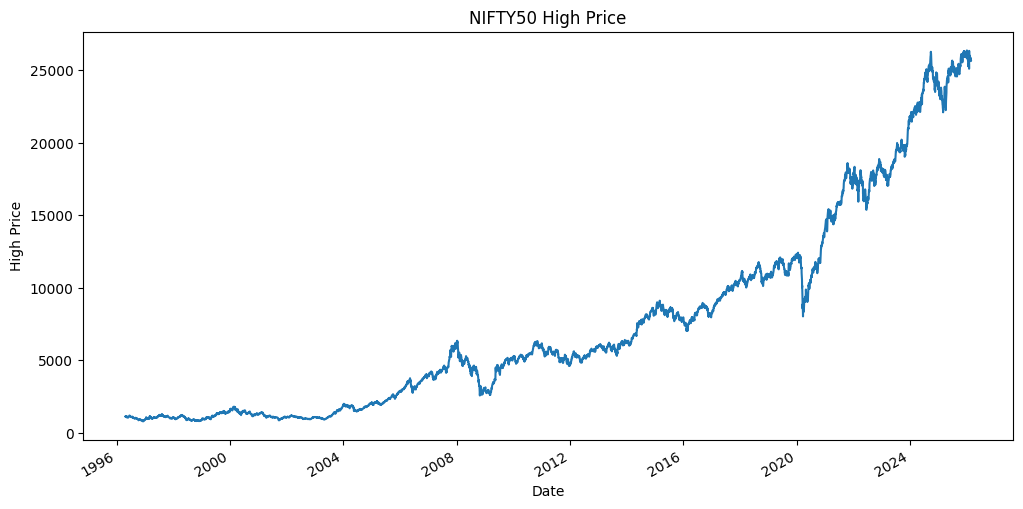

In [11]:
df['High'].plot(figsize=(12, 6))
plt.title('NIFTY50 High Price')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.show()

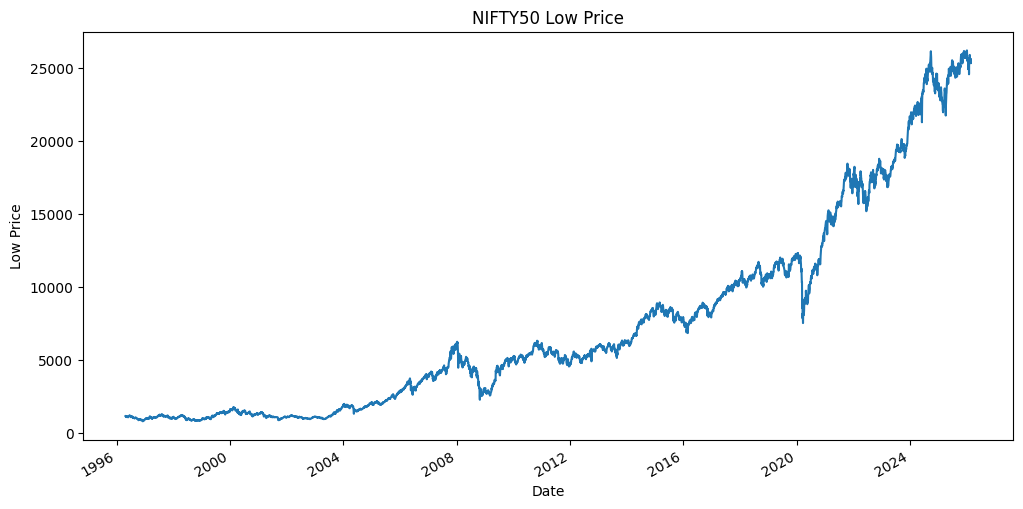

In [12]:
df['Low'].plot(figsize=(12, 6))     
plt.title('NIFTY50 Low Price')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.show()

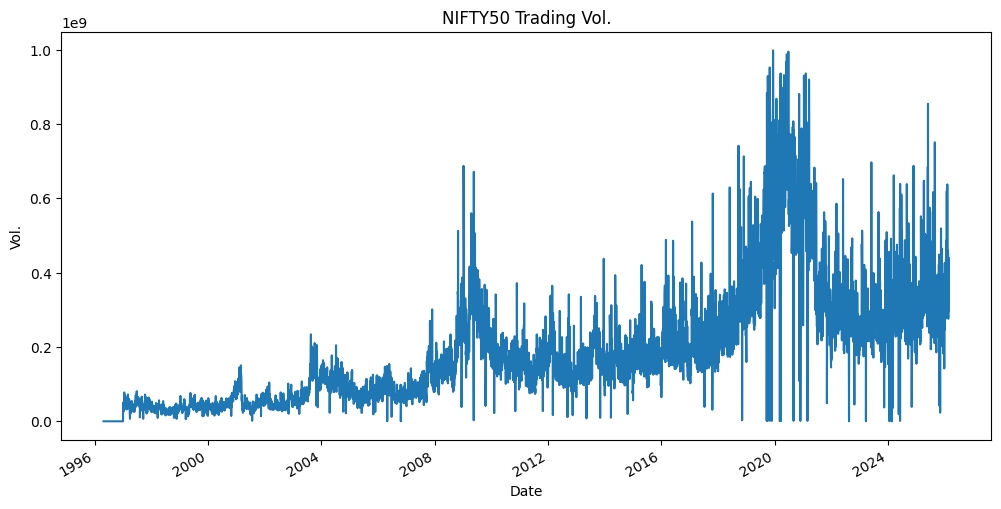

In [13]:
df['Vol.'].plot(figsize=(12, 6))
plt.title('NIFTY50 Trading Vol.')
plt.xlabel('Date')
plt.ylabel('Vol.')
plt.show()

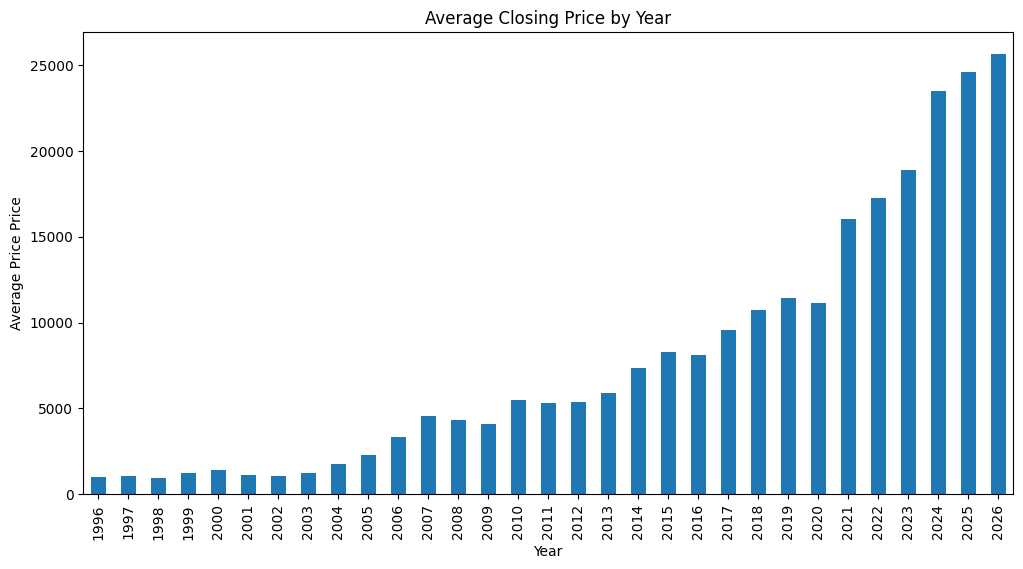

In [14]:
df.groupby(df.index.year)['Price'].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Average Closing Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price Price')
plt.savefig("../plots/Average_Price_Price.png", dpi=300, bbox_inches='tight')
plt.show()

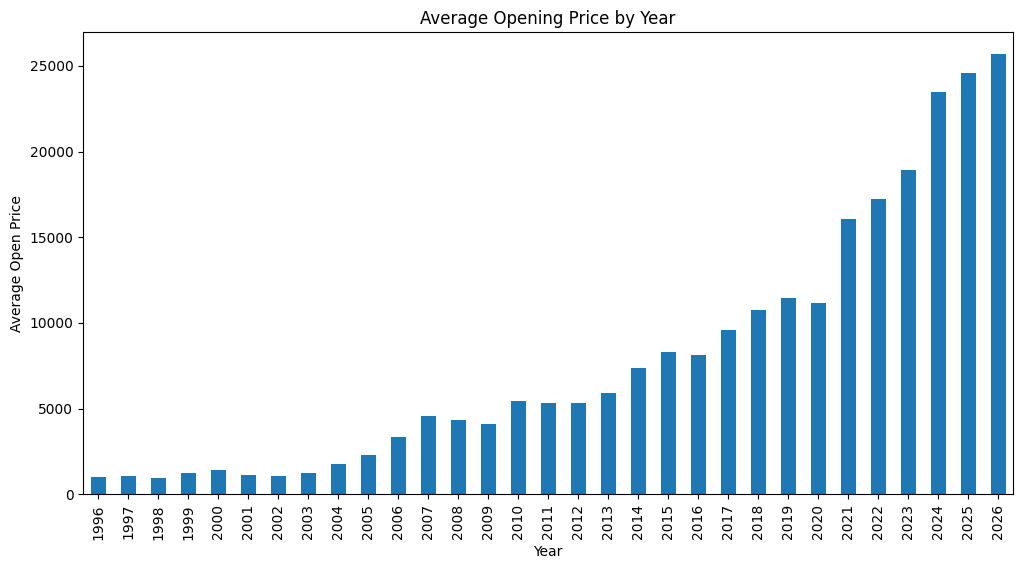

In [15]:
df.groupby(df.index.year)['Open'].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Average Opening Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Open Price')
plt.savefig("../plots/Average_Open_Price.png", dpi=300, bbox_inches='tight')
plt.show()

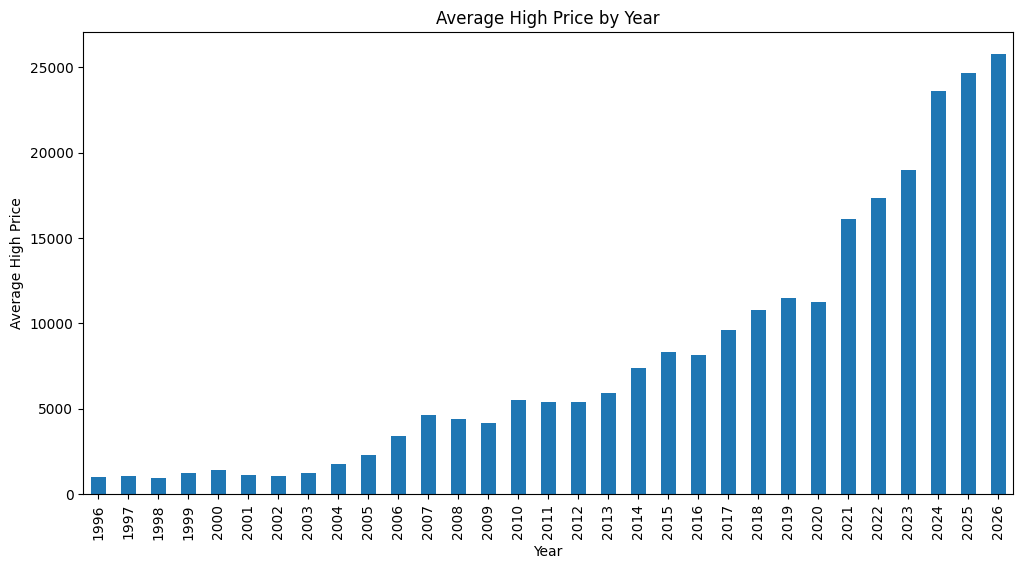

In [16]:
df.groupby(df.index.year)['High'].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Average High Price by Year')
plt.xlabel('Year')
plt.ylabel('Average High Price')
plt.savefig("../plots/Average_High_Price.png", dpi=300, bbox_inches='tight')
plt.show()

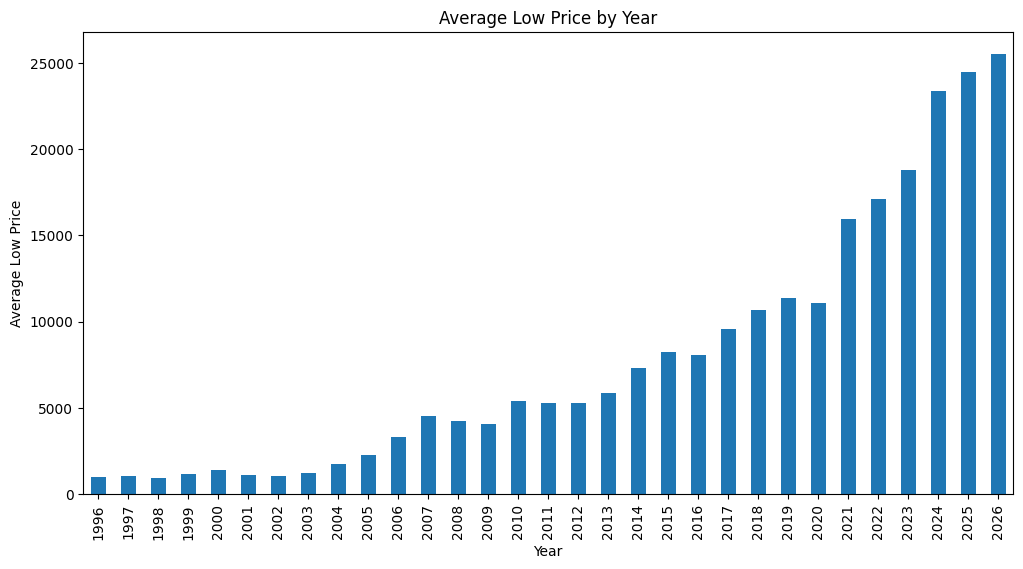

In [17]:
df.groupby(df.index.year)['Low'].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Average Low Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Low Price')
plt.savefig("../plots/Average_Low_Price.png", dpi=300, bbox_inches='tight')
plt.show()

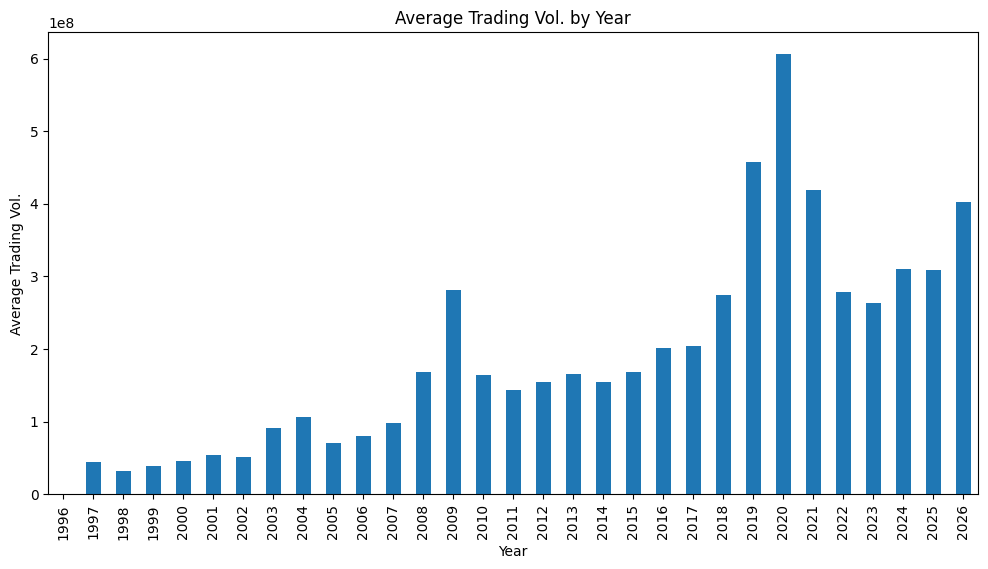

In [18]:
df.groupby(df.index.year)['Vol.'].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Average Trading Vol. by Year')
plt.xlabel('Year')
plt.ylabel('Average Trading Vol.')
plt.savefig("../plots/Average_Vol..png", dpi=300, bbox_inches='tight')
plt.show()

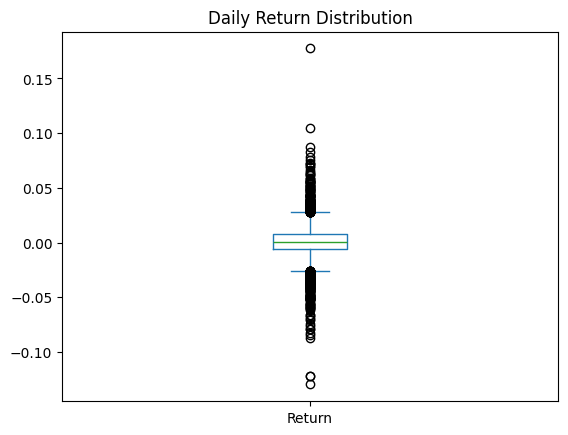

In [19]:
df['Return'] = df['Price'].pct_change()

df[['Return']].plot(kind='box')
plt.title("Daily Return Distribution")
plt.savefig("../plots/Daily_Return_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()

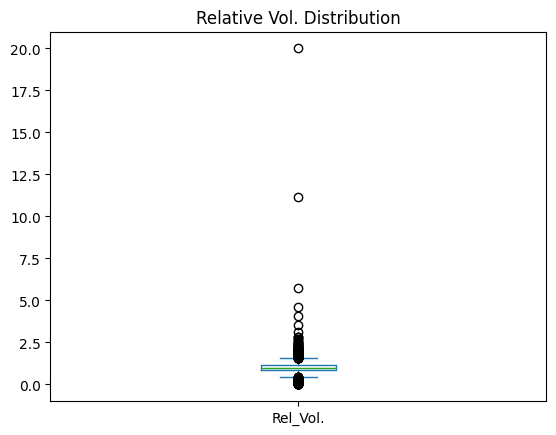

In [20]:
df['Rel_Vol.'] = df['Vol.'] / df['Vol.'].rolling(20).mean()
df['Rel_Vol.'].plot(kind='box')
plt.title("Relative Vol. Distribution")
plt.savefig("../plots/Relative_Vol._Distribution.png", dpi=300, bbox_inches='tight')
plt.show()

In [21]:
df.head()

,Price,Open,High,Low,Vol.,Change %,Return,Rel_Vol.
Date,,,,,,,,
1996-04-24,1145.11,1136.97,1145.11,1126.77,0,4.50,NaN,NaN
1996-04-25,1120.82,1157.94,1160.16,1110.61,0,-2.12,-0.021212,NaN
1996-04-26,1123.63,1133.17,1133.17,1106.29,0,0.25,0.002507,NaN
1996-04-29,1118.37,1112.70,1118.69,1107.51,0,-0.47,-0.004681,NaN
1996-04-30,1114.36,1118.10,1118.23,1112.44,0,-0.36,-0.003586,NaN


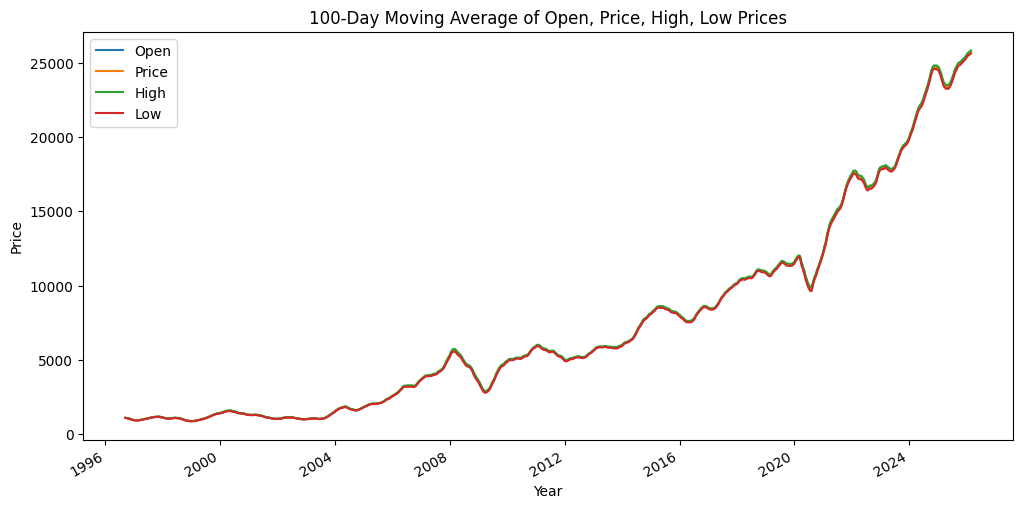

In [22]:
df[['Open', 'Price', 'High', 'Low']].rolling(100).mean().plot(figsize=(12, 6))
plt.title('100-Day Moving Average of Open, Price, High, Low Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.savefig("../plots/100_Day_Moving_Average.png", dpi=300, bbox_inches='tight')
plt.show()

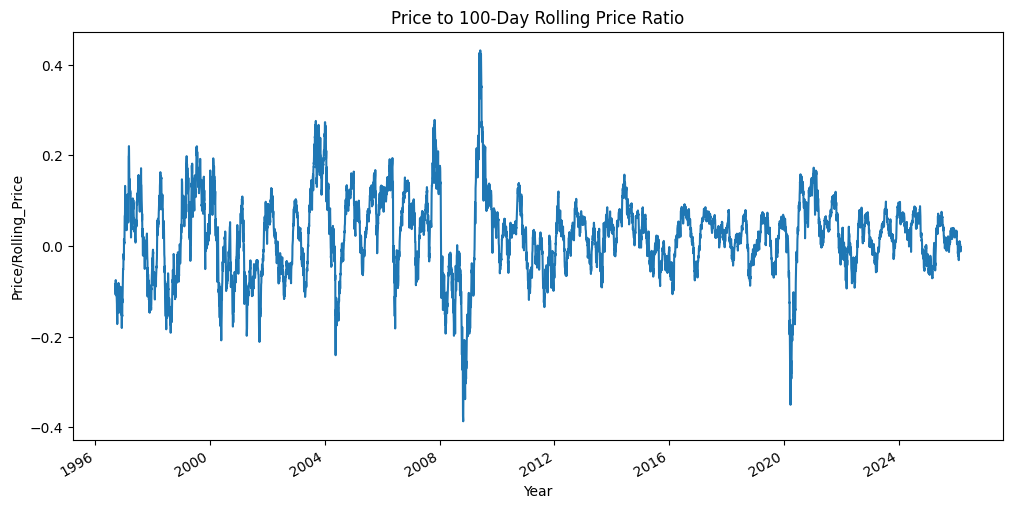

In [23]:
window_100 = df['Price'].rolling(window=100).mean()
df['Price/Rolling_Price'] = (df['Price'] - window_100)/ window_100
df['Price/Rolling_Price'].plot(figsize=(12, 6))
plt.title('Price to 100-Day Rolling Price Ratio')
plt.xlabel('Year')
plt.ylabel('Price/Rolling_Price')
plt.savefig("../plots/Price_to_Rolling_Price_Ratio.png", dpi=300, bbox_inches='tight')
plt.show()

In [24]:
df.rename(columns={'Price/Rolling_Price': 'Trend100'}, inplace=True)